## Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

by Sophia Hadash (0806986) and Evertjan Peer (0746176)



In [1]:
%matplotlib inline

from preamble import *
from sklearn.datasets import *
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *
import pandas as pd
import numpy as np
import scipy as sp
import copy

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
# code peer
oml.config.apikey = 'b493f461d4413a08817d4c78a7427dd0'

## Kernel selection (4 points (1+2+1))
SVMs can be trained with different kernels. Generate a 2-dimensional dataset as shown below and study the effect of the choice of kernel by visualizing the results.

In [8]:
X, y = make_blobs(centers=2, n_samples=1000, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/7)

- Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
    - Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Best parameters: {'kernel': 'linear'}
AUC on training set: 0.995
AUC on test set: 0.984


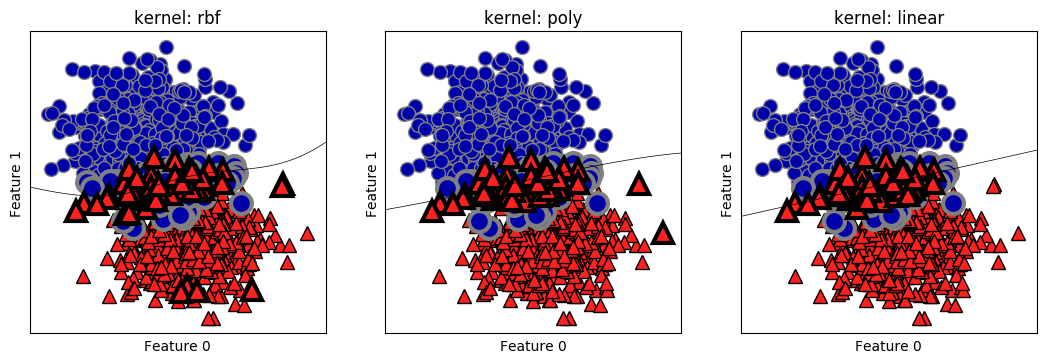

In [9]:
svr = SVC(C=10, gamma=0.1)
param_grid = {'kernel': ['linear','poly','rbf']}
svr_s = GridSearchCV(svr, param_grid, cv=10, n_jobs=-1, scoring='roc_auc');
svr_s.fit(X_train, y_train)
svr_s_trainscore = svr_s.score(X_train, y_train);
svr_s_testscore = svr_s.score(X_test, y_test);
print("Best parameters: {}".format(svr_s.best_params_))
print("AUC on training set: {:.3f}".format(svr_s_trainscore))
print("AUC on test set: {:.3f}".format(svr_s_testscore))

#svm = SVC(kernel='rbf')
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
for ax, k in zip(axes, ['rbf','poly','linear']):
    svm = SVC(kernel=k, C=10, gamma=0.1).fit(X, y);
    scores = cross_val_score(svm, X, y, cv=10, n_jobs=-1, scoring='roc_auc');
    mglearn.plots.plot_2d_separator(svm, X, eps=.5, ax=ax);
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax);
    sv = svm.support_vectors_;
    sv_labels = svm.dual_coef_.ravel() > 0;
    mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax);
    ax.set_xlabel("Feature 0");
    ax.set_ylabel("Feature 1");
    ax.set_title("kernel: {}".format(k));

- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.

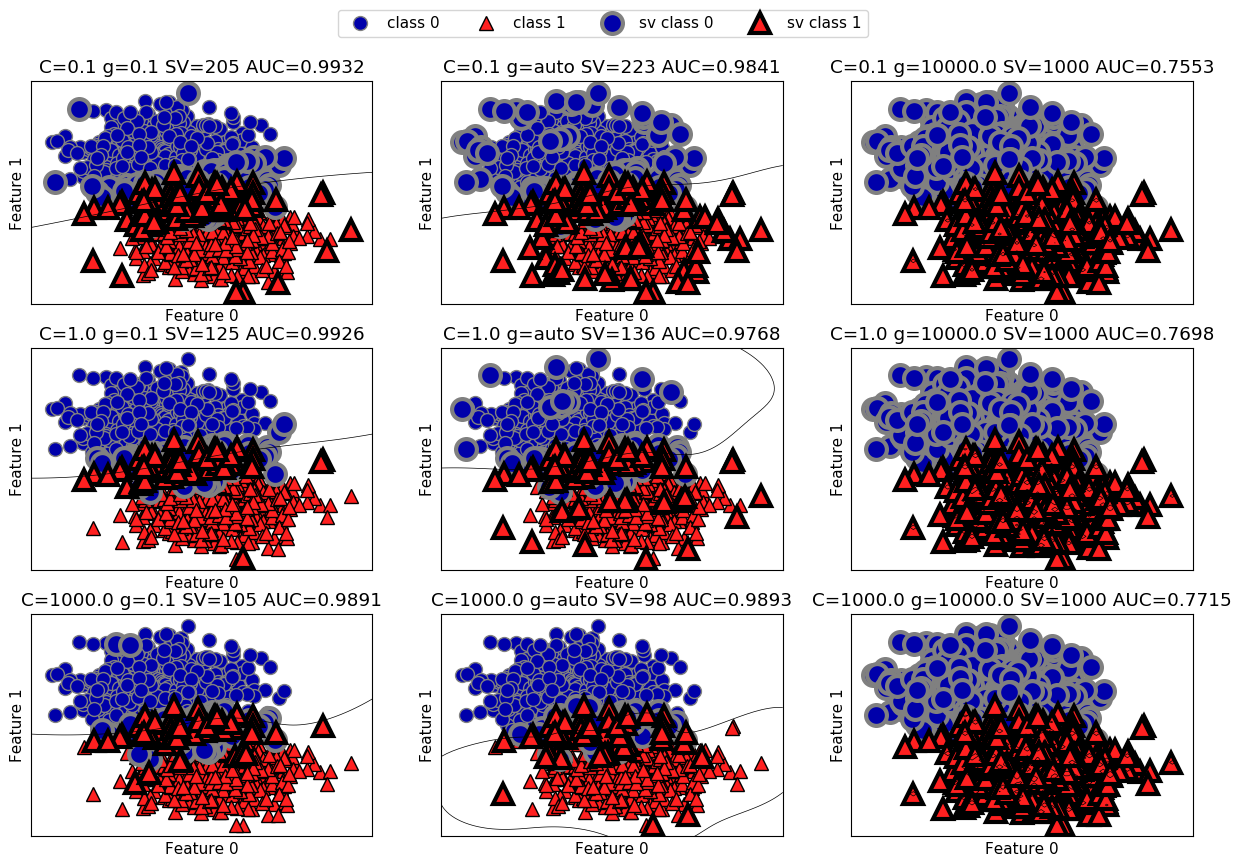

In [10]:
plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [.1,1.,1000.]):
    for a, gamma in zip(ax, [.1,'auto',10000.]):
        svm = SVC(kernel='rbf', C=C, gamma=gamma);
        scores = cross_val_score(svm, X, y, cv=10, n_jobs=-1, scoring='roc_auc');
        svm.fit(X, y)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, ax=a);
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=a);
        sv = svm.support_vectors_;
        sv_labels = svm.dual_coef_.ravel() > 0;
        mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=a);
        a.set_xlabel("Feature 0");
        a.set_ylabel("Feature 1");
        a.set_title("C={:.1f} g={} SV={} AUC={:.4f}".format(C, gamma, len(sv), scores.mean()))
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2));

    - The three rightmost graphs use all the datapoints as support vectors, so those are clearly overfitting.
    - The top middle, top left, center middle and bottom center graphs show that a lot of support vectors are taken on the periphery, so they are also overfitting.
    - The other graphs are good.
    - There is no underfitting because a linear separator seems appropriate with this data set.

- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

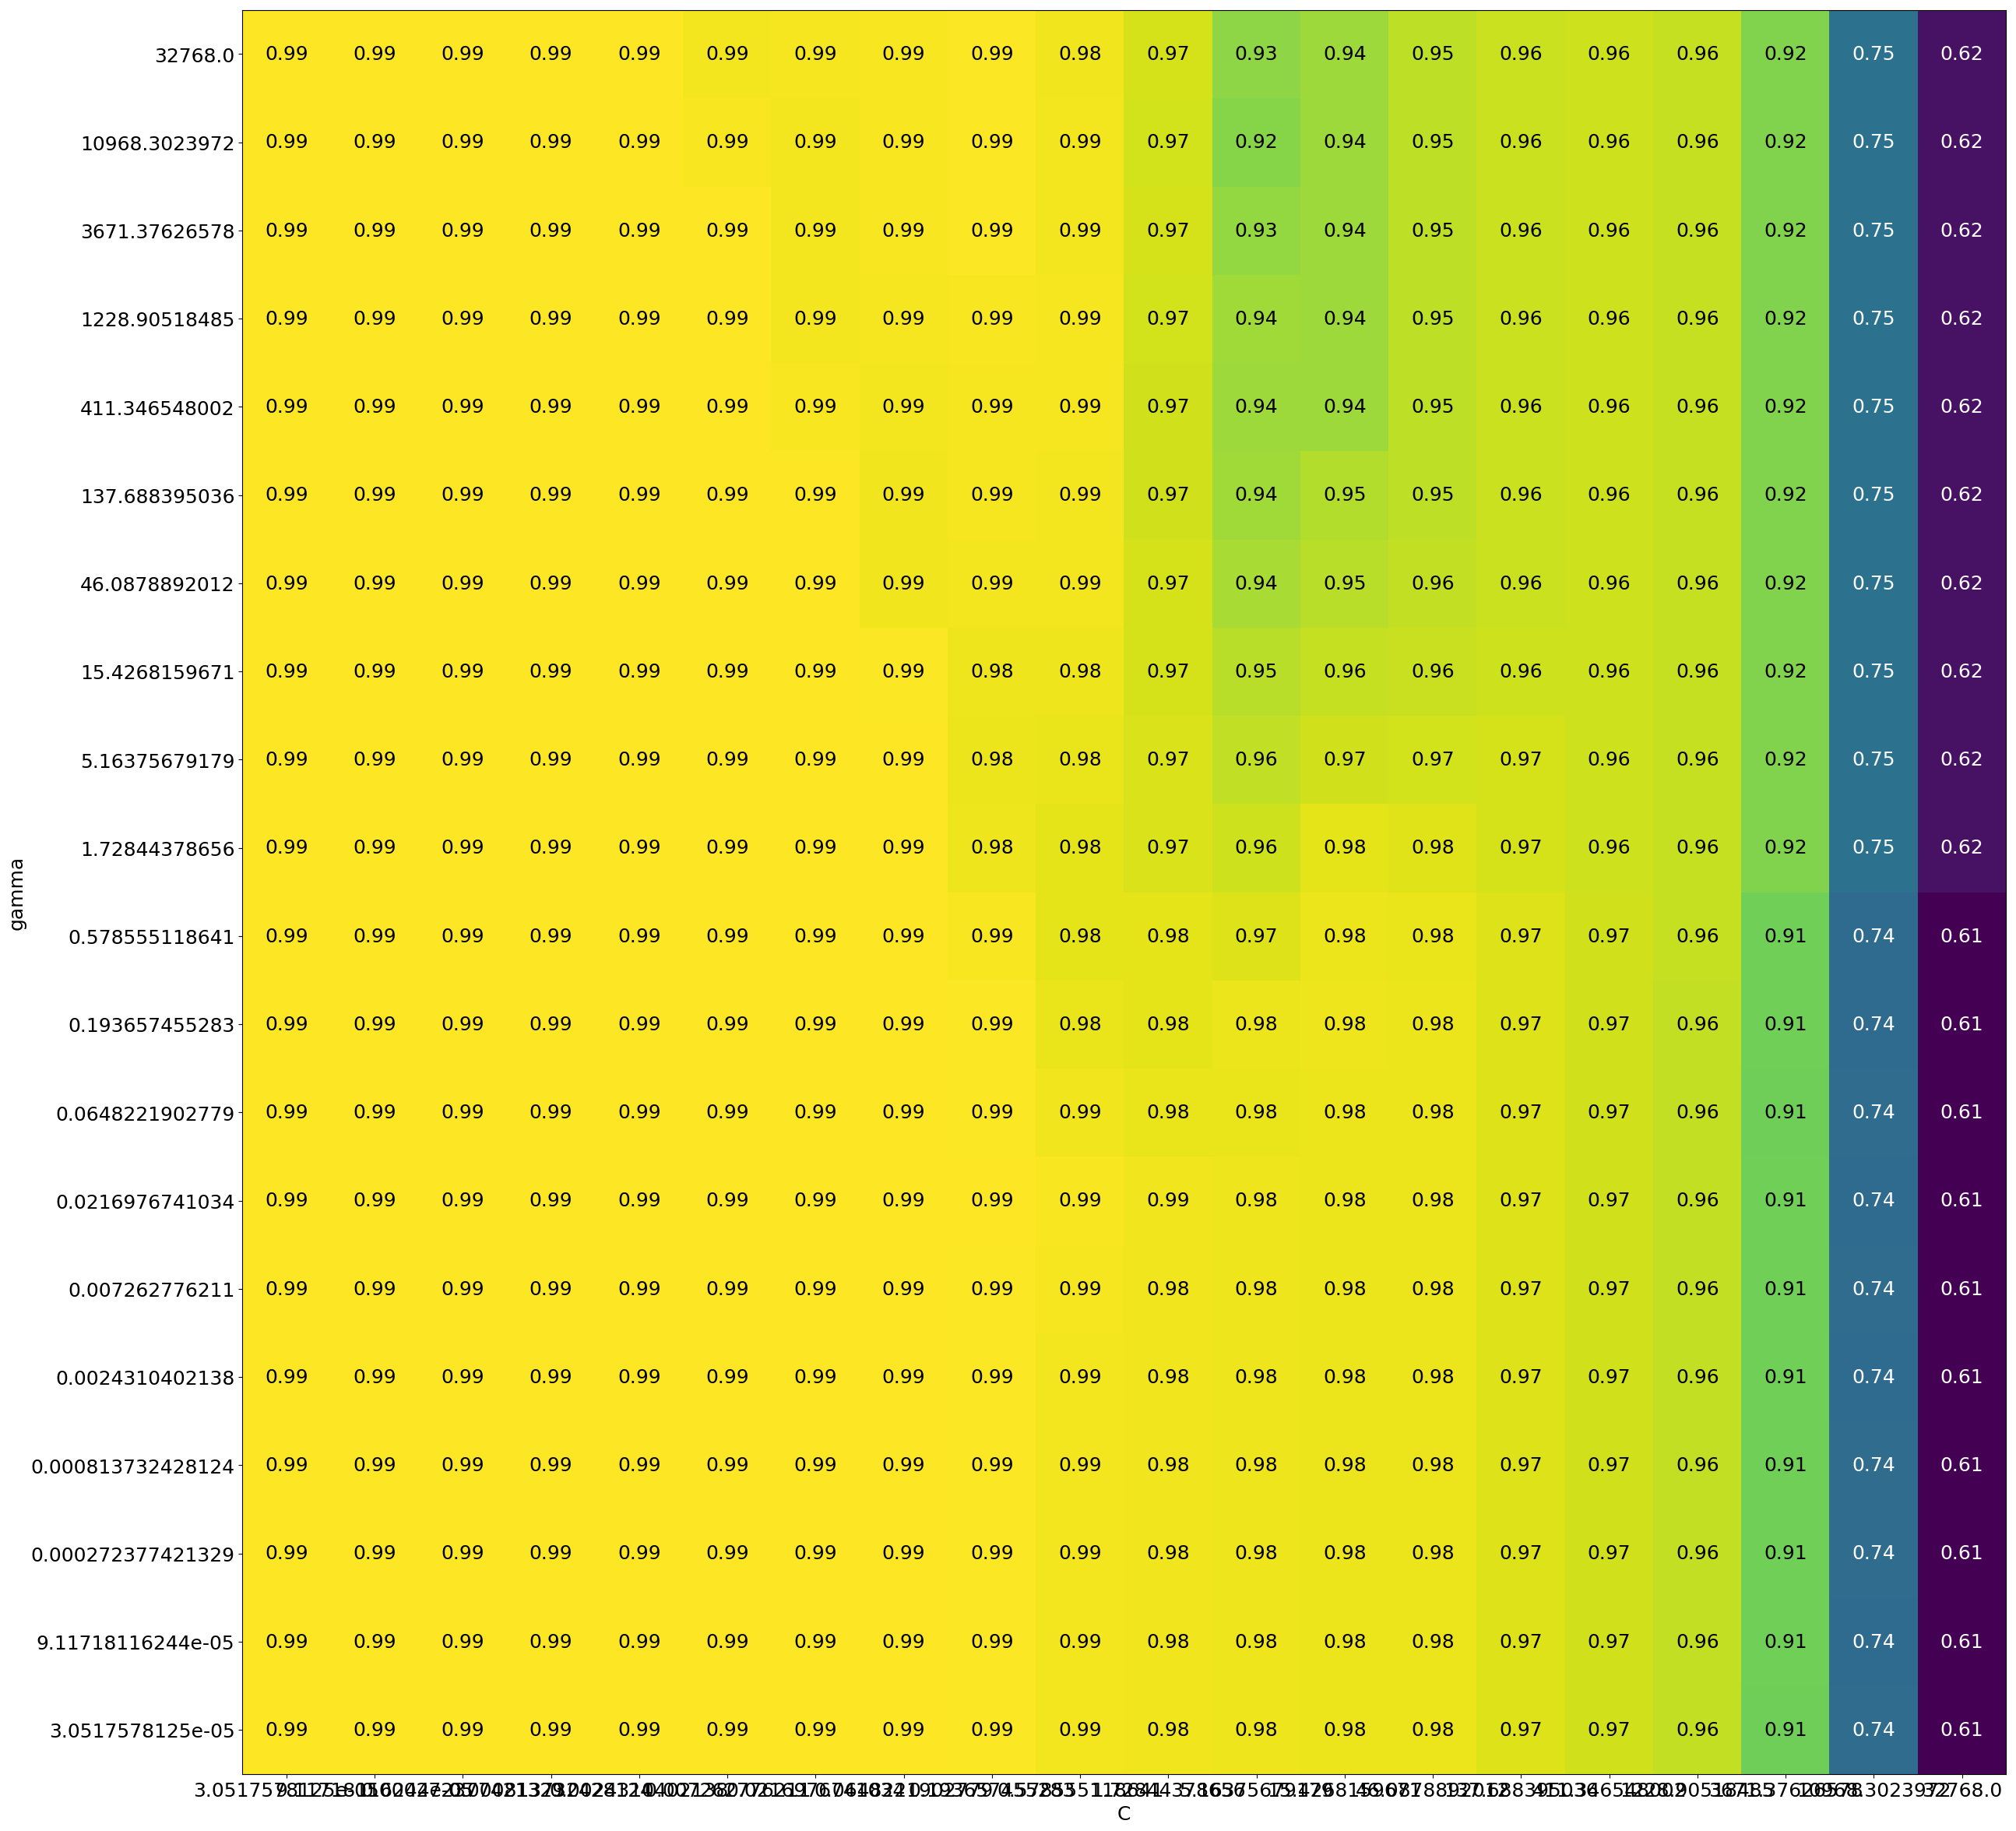

In [11]:
svm = SVC(kernel='rbf')
param_grid = {'C': np.logspace(-15,15,20,base=2),
              'gamma': np.logspace(-15,15,20,base=2)}
grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1, scoring='roc_auc');
grid_search.fit(X, y)

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(20, 20)
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(1, 1, figsize=(30, 30))
mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid['C'],
                      ylabel='gamma', yticklabels=param_grid['gamma'], cmap="viridis", fmt="%.2f", ax=axes);

    - For very high C, performance is bad and the SVM is overfitting.
    - If gamma is small, higher values for C are allowed
    - For high gamma values the SVM is overfitting, just like in the previous assignment
    - For very small gamma and big C, the SVM is underfitting

## Robots and SVMs (4 points (2+1+1))

The [Wall Robot Navigation dataset](http://www.openml.org/d/1497) contains about 5500 readings of an ultrasound sensor array mounted on a robot, and your task is to finetune and train an SVM classifier to predict how the robot should move next.

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for Accuracy with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and Accuracy performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the **whole** dataset to obtain a clean evaluation. What is the mean optimized performance? Is this in line with the optimized result of the random search of the previous question?
- Train an SVM using the optimal hyperparameter configuration you found (in part 1 of this question) and test it on the held out (20%) test set. Compare this Accuracy result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

## Initialization
The dataset constists of 24 features, which are all measures from sensors attached to the robot. When inspecting the features on OpenML we see that all features have the same scaling. Therefore, we do not have to apply scaling before applying the SVM here. 

In [44]:
#GET DATA 
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute); 

#we have 24 features, and 5456 observations (rows)
#we have a multi-class target attribute. 
#There are 4 values: 
#Class: {Move-Forward, Slight-Right-Turn, Sharp-Right-Turn, Slight-Left-Turn}

#Do Stratified Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

## Part 1

In [45]:
#On training set alone, optimize the main hyperparameters of the SVM for Accuracy with a random search. 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.svm import SVC
from scipy.stats import randint

param_grid = [
  {'C': expon(scale=100), 'kernel': ['linear']},
  {'C': expon(scale=100), 'degree': randint(2,11), 'kernel': ['poly']},
  {'C': expon(scale=100), 'gamma': expon(scale=0.1), 'kernel': ['rbf']}
 ]

best_acc = 0
best_param = {}

#note: standard 3fold cv will be used. 
for params in param_grid:
    print("Kernel: {}".format(params['kernel']))
    random_search = RandomizedSearchCV(SVC(), param_distributions=params, n_iter=20, n_jobs=-1,  random_state=0)
    random_search.fit(X_train, y_train)
    print("Best parameters: {}".format(random_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
    if random_search.best_score_ > best_acc:
        best_acc = random_search.best_score_
        best_param = random_search.best_params_

Kernel: ['linear']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114cb3b00>, 'kernel': ['linear']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring=None, verbose=0)

Best parameters: {'C': 331.49121820538141, 'kernel': 'linear'}
Best cross-validation score: 0.73
Kernel: ['poly']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114cb3c88>, 'kernel': ['poly'], 'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114cb3320>},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring=None, verbose=0)

Best parameters: {'C': 102.14318863920728, 'kernel': 'poly', 'degree': 2}
Best cross-validation score: 0.90
Kernel: ['rbf']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114cb3898>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114cb3a20>, 'kernel': ['rbf']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring=None, verbose=0)

Best parameters: {'C': 73.782727831105859, 'gamma': 0.05355657183007563, 'kernel': 'rbf'}
Best cross-validation score: 0.91


In [46]:
print("Best random search Accuracy: {:.2f}\n".format(best_acc))
print("Achieved with parameters:", best_param)
#print(best_param)

Best random search Accuracy: 0.91

Achieved with parameters: {'C': 73.782727831105859, 'gamma': 0.05355657183007563, 'kernel': 'rbf'}


## part 2 
use a 5x3 fold nested cross-validation on the whole dataset to obtain a clean evaluation. 

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

#same grid as before
param_grid = [
  {'C': expon(scale=100), 'kernel': ['linear']},
  {'C': expon(scale=100), 'degree': randint(2,11), 'kernel': ['poly']},
  {'C': expon(scale=100), 'gamma': expon(scale=0.1), 'kernel': ['rbf']}
 ]
print(param_grid)

best_mean = 0

for params in param_grid:
    print("Kernel: {}".format(params['kernel']))
    scores = cross_val_score(RandomizedSearchCV(SVC(), param_distributions=params, n_iter=20,  random_state=0),
                          X, y, cv=5, n_jobs=-1)
    print("Cross-validation scores: ", scores)
    print("Mean cross-validation score: ", scores.mean())   
    if scores.mean() > best_mean:
        best_mean = scores.mean()

print("Best (mean) nested score:", best_mean)

[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1109f5198>, 'kernel': ['linear']}, {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1109f57f0>, 'kernel': ['poly'], 'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x113fb2f60>}, {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114c7f780>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114c7ff28>, 'kernel': ['rbf']}]
Kernel: ['linear']
Cross-validation scores:  [ 0.692  0.689  0.671  0.728  0.751]
Mean cross-validation score:  0.70603243003
Kernel: ['poly']
Cross-validation scores:  [ 0.779  0.821  0.885  0.918  0.888]
Mean cross-validation score:  0.858190249565
Kernel: ['rbf']
Cross-validation scores:  [ 0.778  0.803  0.906  0.889  0.883]
Mean cross-validation score:  0.851588101529
Best (mean) nested score: 0.858190249565


In [48]:
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.778  0.803  0.906  0.889  0.883]
Mean cross-validation score:  0.851588101529


## part 3

In [49]:
print("Train a SVC with best parameters: ", best_param)

if best_param['kernel']=='rbf':
    svm = SVC(kernel= 'rbf', gamma= best_param['gamma'], C=best_param['C'])
elif best_param['kernel']=='poly':
    svm = SVC(kernel= 'poly', degree=best_param['degree'], C=best_param['C'])
elif best_param['kernel']=='linear':
    svm = SVC(kernel='linear', C=best_param['C'])
    
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Train a SVC with best parameters:  {'C': 73.782727831105859, 'gamma': 0.05355657183007563, 'kernel': 'rbf'}


SVC(C=73.782727831105859, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05355657183007563,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Test set accuracy: 0.92


- We find a test set accuracy of 0.92 versus a mean result of 0.86 for the nested CV. The nested method thus provides a lower score. 
- A non-nested CV can thus be overly optimistic, whereas a nested cv can get a more realistic result. It cancels out some of the variation in 'lucky' and 'unlucky' splits of the data into a train and test set. 
- If you would build this robot in practice, and have some computational time to spend, a nested CV with a gridsearch would be a very good option to explore the best hyperparameters. Perhaps you could use a randomsearch first to get a rough idea of which ranges the gridsearch should focus on. I expect you can get a higher score than the 0.86 accuracy we found in the 2nd part by choosing other parameters. Of course, in addition the folds can be increased as well for the nested CV (both inner and outer). 

- We find that choosing a kernel is very important. The linear kernel is heavily outperformed by the poly and rbf kernel. It also does make sense to tune the other parameters. For instance we see that the optimal C parameter of around 330 is found for the linear kernel, whereas the default value is C=1. The best score with the polynomial kernel we find when using degree = 2 (default degree = 3) and a C score of around 100 (again very different from the default setting). The choice of a suitable polynomial degree heavily depends on the data. In general it really makes sense to set your parameters, since this tailors your model to the specific data you have. 

## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

## Part 1
- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.

In [92]:
#reuse code from lecture 04
ram_prices = pd.read_csv('data/ram_price.csv')

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
randomforest = RandomForestRegressor().fit(X_train, y_train)
sv = SVR(kernel='linear').fit(X_train, y_train)


# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_rf = randomforest.predict(X_all)
pred_sv = sv.predict(X_all)


#Score on test set
#use log transform to obtain score: 
#split data_test to X, y
X_test = data_test.date[:, np.newaxis]
y_test = np.log(data_test.price)

print("Tree Regression Test set score (R^2): {:.2f}".format(tree.score(X_test, y_test)))
print("Linear Regression Test set score (R^2): {:.2f}".format(linear_reg.score(X_test, y_test)))
print("Random Forest Regression Test set score (R^2): {:.2f}".format(randomforest.score(X_test, y_test)))
print("SV Regression Test set score (R^2): {:.2f}".format(sv.score(X_test, y_test)))

# undo log-transform of predictions for plot: 
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_rf = np.exp(pred_rf)
price_sv = np.exp(pred_sv)


Tree Regression Test set score (R^2): -5.23
Linear Regression Test set score (R^2): 0.83
Random Forest Regression Test set score (R^2): -4.88
SV Regression Test set score (R^2): 0.42


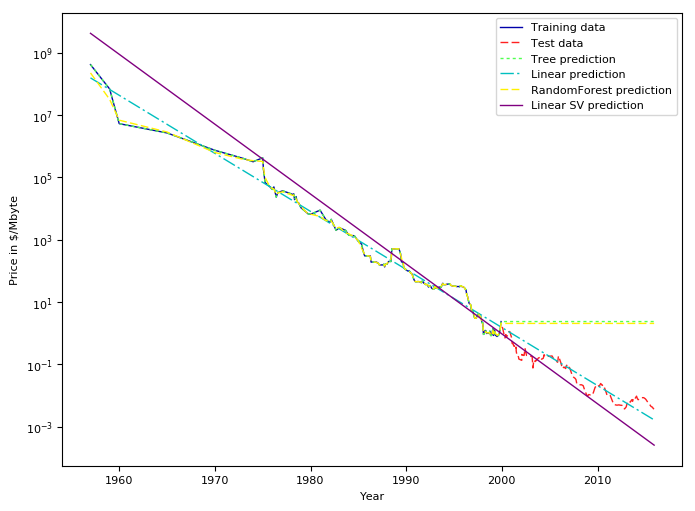

In [93]:
plt.figure(figsize=(8,6))
plt.rcParams['lines.linewidth'] = 1

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.semilogy(ram_prices.date, price_rf, label="RandomForest prediction" )
plt.semilogy(ram_prices.date, price_sv, label="Linear SV prediction", color="purple")
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");
plt.legend();

## Part 2 
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

## Gaussian processes on increasing amount of samples. 
In order to understand the Gaussian processes, we have created a few different models which all achieved different performances. We will below show two variations: one model where we did not scaled the feature, and one where we did scale the feature. 

NOTE: when modelling the gaussian processes we experienced that the kernel we used (default) overfitted the datapoints quite heavily. We therefore used alpha to regularized the model. In the codes below we used alpha = 0.1. 


### Gaussian using non-scaled features 

Random draw will likely include mostly datapoints from 1985 to 2000 since there are way more measures there


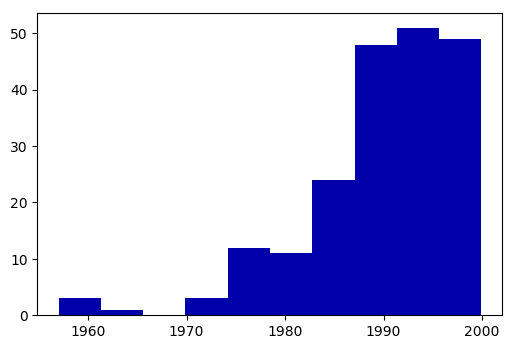

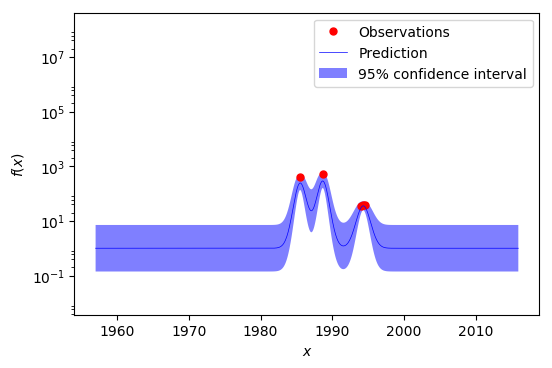

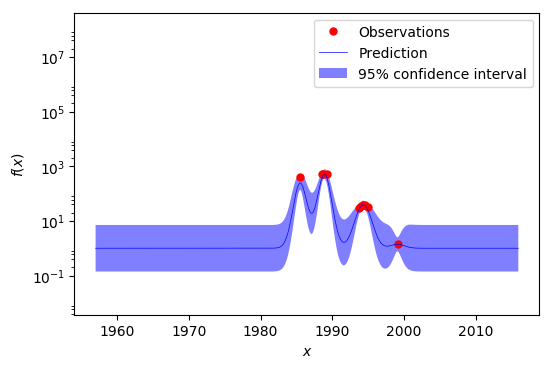

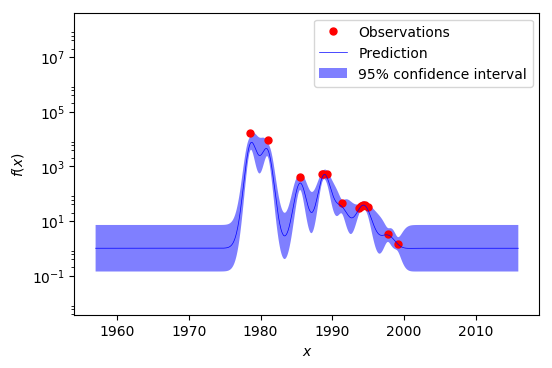

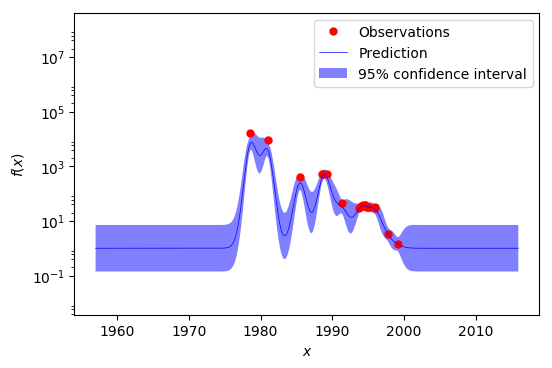

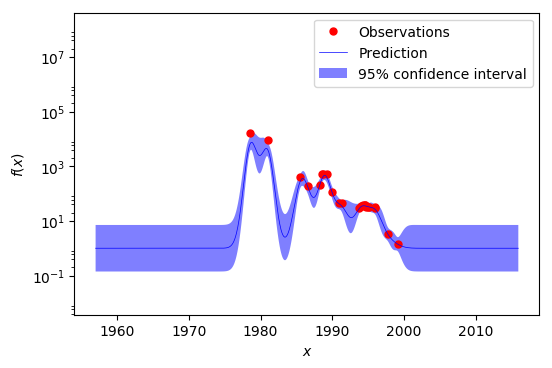

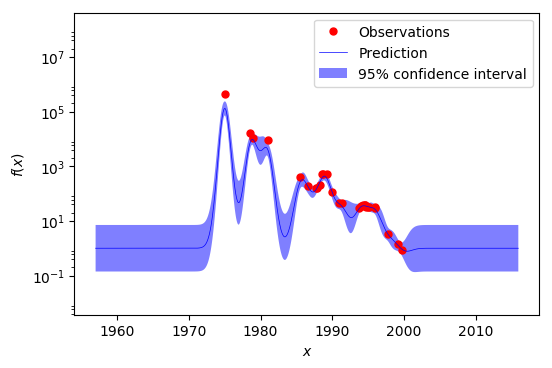

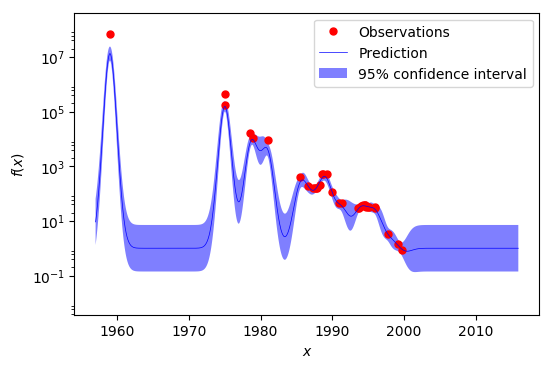

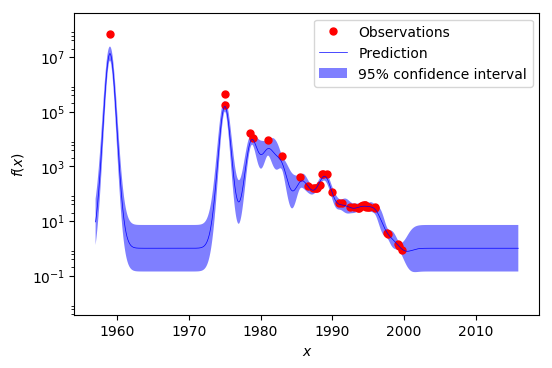

In [29]:
# On training data:
# start with 5 random samples, train gaussian, plot predictions (mean + uncertainty interval) for both training and test
# then add 5 more points, retrain, and redraw. 
# do this a couple of times and interpret / explain what you see 
# (probably the uncertainty decreases)
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import MinMaxScaler

ram_prices = pd.read_csv('data/ram_price.csv')

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
X_test = data_test.date[:, np.newaxis]

from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, DotProduct

plt.hist(X_train)
print("Random draw will likely include mostly datapoints from 1985 to 2000 since there are way more measures there")

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
y_test = np.log(data_test.price)

#for size in [5]:
for size in range(5, 41, 5):
    X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=1)
    # Mesh the input space for evaluations of the real function, the prediction and
    # its MSE
    x = np.atleast_2d(np.linspace(min(X_train), max(X_test), 1000)).T
    
    gp = GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=3).fit(X_sample, y_sample)
    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)
    y_pred_low = y_pred - 1.96*sigma
    y_pred_upper = y_pred + 1.96*sigma

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure()
    plt.semilogy(X_sample, np.exp(y_sample), 'r.', markersize=10, label=u'Observations')
    plt.semilogy(x, np.exp(y_pred), 'b-', label=u'Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([np.exp(y_pred_low),
                             np.exp(y_pred_upper)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
                
    
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(min(ram_prices.price),max(ram_prices.price))
    plt.legend(loc='upper right')

When increasingly feeding more data to the gaussian process, we see that the uncertainty decreases in the areas around the data points. As explained during the lectures, the 'set of possible gaussians' decreases, which results in a more certain model. However, in the areas where no data points are seen, the uncertainty remains. Note however that the gaussian processes here already have a quite big tolerance for noise in the data: because of the setting of alpha the algorithm allows the data points to be not exactly on the gaussians. Therefore, the gaussian fluctuates less than you would have when setting alpha to the default value. 

GP Regression Test set score (R^2): -3.27


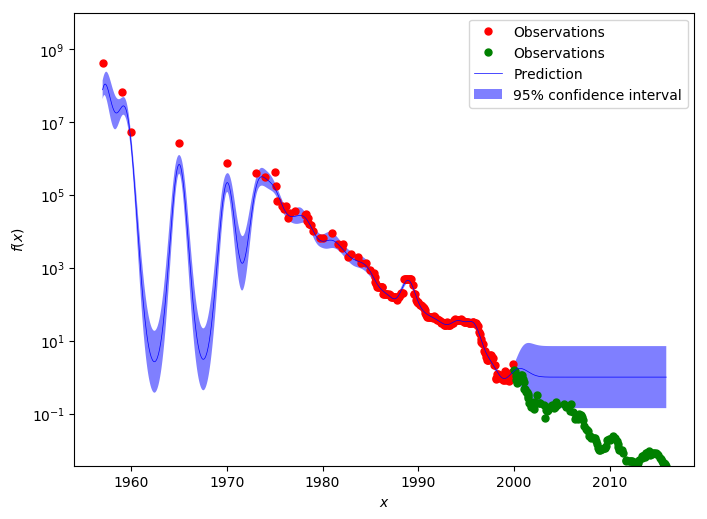

In [48]:
# full data
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(min(ram_prices.date), max(ram_prices.date), 1000)).T

#alpha 1e-10 default 
gp = GaussianProcessRegressor(alpha = 0.1, n_restarts_optimizer=9).fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(8,6))
plt.semilogy(X_train, np.exp(y_train), 'r.', markersize=10, label=u'Observations')
plt.semilogy(X_test, np.exp(y_test), 'g.', markersize=10, label=u'Observations')
plt.semilogy(x, np.exp(y_pred), 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([np.exp(y_pred - 1.9600 * sigma),
                        (np.exp(y_pred + 1.9600 * sigma))[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0,10000000000)
plt.legend(loc='upper right')

print("GP Regression Test set score (R^2): {:.2f}".format(gp.score(X_test, (y_test))))




On the full dataset, we obtain a R^2 score of -3.27. This is comparable to the random forest and tree regressors. It seems to be an overkill to use a gaussian process to model a linear relation with a Gaussian process (as it is with a random forest / tree regressor). 

## Gaussian using scaled features (Min-max Scaler)

/Users/evertjanpeer/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/evertjanpeer/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/evertjanpeer/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.re

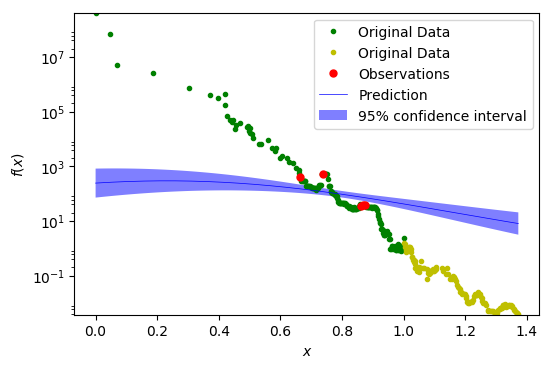

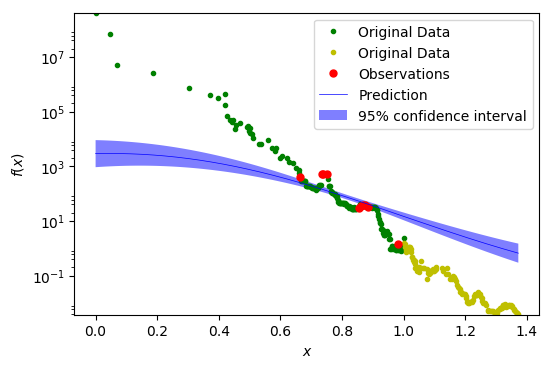

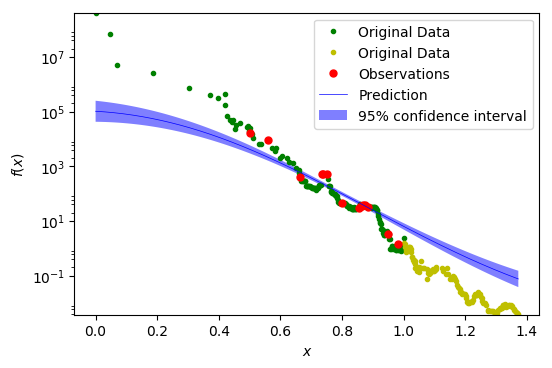

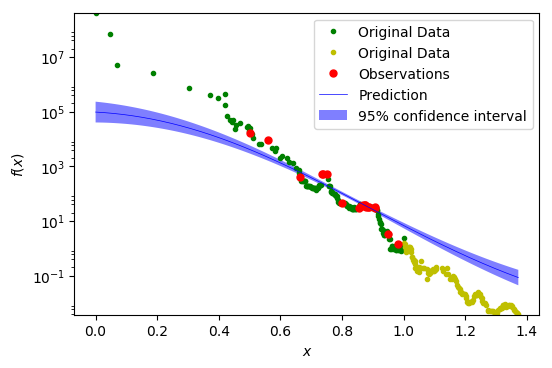

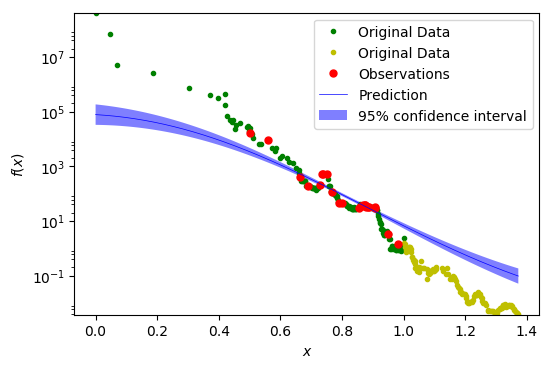

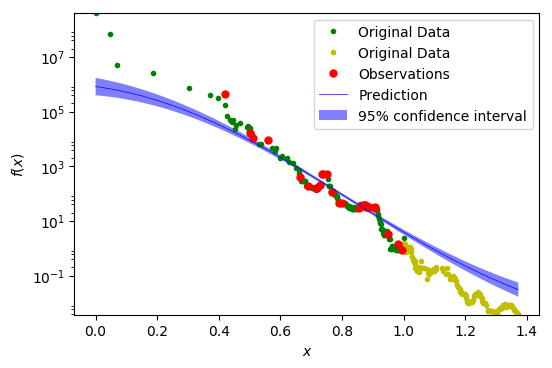

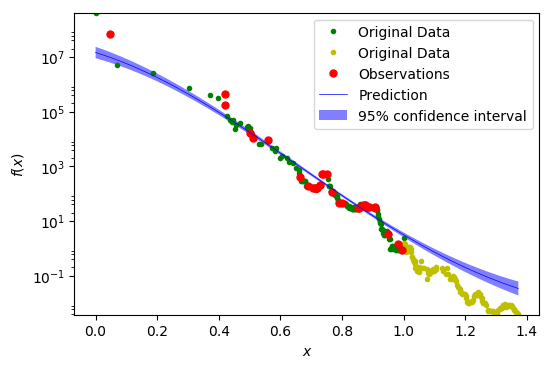

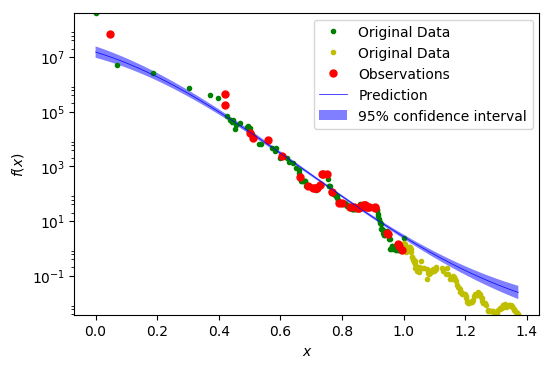

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import MinMaxScaler

ram_prices = pd.read_csv('data/ram_price.csv')

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
X_test = data_test.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
y_test = np.log(data_test.price)

# Scale features for Gaussian. 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#for size in [5]:
for size in range(5, 41, 5):
    X_sample, _, y_sample, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=1)
    # Mesh the input space for evaluations of the real function, the prediction and
    # its MSE
    x = np.atleast_2d(np.linspace(0, max(X_test_scaled), 1000)).T
    gp = GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=9).fit(X_sample, y_sample)
    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)
    y_pred_upper = y_pred + 1.96*sigma
    y_pred_low = y_pred - 1.96*sigma

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure()
    plt.semilogy(scaler.transform(data_train.date), data_train.price, 'g.', label=u'Original Data')
    plt.semilogy(scaler.transform(data_test.date), data_test.price, 'y.', label=u'Original Data')
    plt.semilogy(X_sample, np.exp(y_sample), 'r.', markersize=10, label=u'Observations')
    plt.semilogy(x, np.exp(y_pred), 'b-', label=u'Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([np.exp(y_pred_low),
                             np.exp(y_pred_upper)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(min(ram_prices.price),max(ram_prices.price))
    plt.legend(loc='upper right')

Scaling the features using a min-max scaler, in combination with a very high alpha value (0.01), we seem to be able to model an almost linear relation between the scaled dates and the logged prices using a gaussian process. We see that by adding more and more data points, the model learns the 'slope' of the relation, and adjusts according to it. As more points are added, the uncertainty decreases around those points. 

GP Regression Test set score (R^2): 0.43


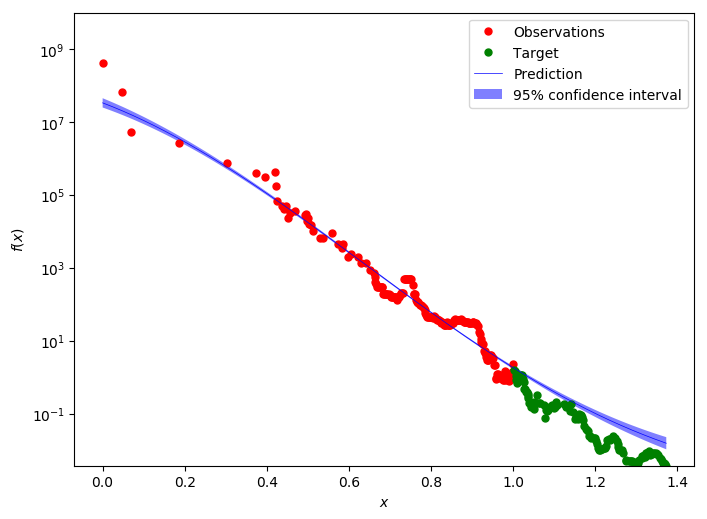

In [51]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler

#reuse code from lecture 04
ram_prices = pd.read_csv('data/ram_price.csv')

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
X_test = data_test.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
y_test = np.log(data_test.price)

# scale features for gaussian
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0,  max(X_test_scaled), 1000)).T

#alpha 1e-10 default 
gp = GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=9).fit(X_train_scaled, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

y_pred_lower = y_pred-1.9600*sigma
y_pred_upper = y_pred+1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(8,6))
plt.semilogy(X_train_scaled, np.exp(y_train), 'r.', markersize=10, label=u'Observations')
plt.semilogy(X_test_scaled, np.exp(y_test), 'g.', markersize=10, label=u'Target')
plt.semilogy(x, np.exp(y_pred), 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([np.exp(y_pred - 1.9600 * sigma),
                        (np.exp(y_pred + 1.9600 * sigma))[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0,10000000000)
plt.legend(loc='upper right')

# use log_target for scoring. 
print("GP Regression Test set score (R^2): {:.2f}".format(gp.score(X_test_scaled, y_test)))


Interesting to see is that we now achieve a fairly high R^2 score on our test set (compared to most of the other algorithms we saw). Although in the end we have been able to create a fairly decent model using Gaussian Processes, it still feels these models are not that suitable for simple linear relations. At least they are more cumbersome to train for a relation like this, compared to a linear model. 

## A benchmark study (3 points (2+1))

In [12]:
#Start with defining functions used in this assignment.

def Sgn(X):
    if X < 0:
        return -1;
    elif X == 0:
        return 0;
    else:
        return 1;

def RanksumWilcoxon(X1, X2):
    if len(X1) != len(X2) | len(X1)==0:
        raise ValueError('X1 and X2 need to have the same length and be bigger than zero.');
        return;
    
    X1r = list(); X2r = list(); Xabs = list(); Xsgn = list(); rank = list();
    for i in range(len(X1)):
        v1 = abs(X2[i] - X1[i]);
        if (v1 == 0): continue;
        v2 = Sgn(X2[i] - X1[i]);
        X1r.append(X1[i])
        X2r.append(X2[i])
        Xabs.append(v1);
        Xsgn.append(v2);
        
    if len(X1r) == 0:
        raise ValueError('X1 and X2 need to be different.');
        return;
    
    Xabs, X1r, X2r, Xsgn = zip(*sorted(zip(Xabs, X1r, X2r, Xsgn)))
    Nr = len(X1r)
    
    cur_val = 0;
    tie_counter = 0;
    for i in range(Nr):
        if Xabs[i] > cur_val:
            if tie_counter != 0:
                tie_rank = (rank[i - 1 - tie_counter] + rank[i-1]) / 2
                for j in range(tie_counter+1):
                    rank[i-1-tie_counter+j] = tie_rank;
                tie_counter = 0;
            
            cur_val = Xabs[i];
        else:
            tie_counter += 1;
        rank.append(i+1);
    
    W = 0;
    for i in range(Nr):
        W += Xsgn[i] * rank[i];
    
    var = Nr*(Nr+1)*(2*Nr+1)/6;
    z = W / (var**.5);
    p = sp.stats.norm.cdf(-abs(z)) + 1 - sp.stats.norm.cdf(abs(z))
    
    return W, p

def bonferroni(N, alpha):
    return 1 - ( 1 - alpha )**(1/N);

def ClassifierAbbreviation(nr):
    if nr == 0:
        return "LR";
    elif nr == 1:
        return "RF";
    elif nr == 2:
        return "SVC";
    return "";

A benchmark study is an experiment in which multiple algorithms are evaluated on multiple datasets. The end goal is to study whether one algorithm is generally better than the others. Meaningful benchmark studies can grow quite complex, here we do a simplified variant.

* Download OpenML datasets 37, 470, 1120, 1464 and 1471. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?
    * Note that these datasets have categorical features, different scales, missing values, and (likely) irrelevant features. You'll need to build pipelines to correctly build all models. Also remove any row identifiers (see, e.g., https://www.openml.org/d/1120)
    * Hint: You can either compare the performances directly, or (better) use a statistical significance test, e.g. a pairwise t-test or (better) Wilcoxon signed ranks test, to see whether the performance differences are significant. This is covered in statistics courses. You can then count wins, ties and losses.

In [17]:
#choose datasets, classifiers, parameters and options
datasets = (37, 470, 1120, 1464, 1471);
classifiers = [LogisticRegression(n_jobs=-1), RandomForestClassifier(n_jobs=-1), SVC(kernel = 'rbf')];
param_grids = [{'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'Classifier__penalty': ["l1","l2"]},
               {'Classifier__n_estimators': np.logspace(0, 9, 10, base=2, dtype='int16'),
                'Classifier__max_depth': np.linspace(1, 10, 10, dtype='int16')},
               {'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'Classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}];
outer_test_size = .15;
inner_test_size = .15;
cross_validation = 10;

#calculate the scores and store in lists
s = list(); s_opt = list(); s_opt_p = list(); s_opt_b = list(); d = list();
print("Computing:");
for i in range(len(datasets)):#
    dataset = oml.datasets.get_dataset(datasets[i])
    d.append(dataset.name);
    
    X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=outer_test_size);
    
    st = list();
    st_opt = list();
    st_opt_b = list();
    st_opt_p = list();
    
    if i>0: print("");
    print("Database {}: ".format(i), end='');
    for j in range(len(classifiers)):
        pipe = Pipeline(steps=[
            ('Imputer', Imputer(strategy='median')),
            ('Scaler', MinMaxScaler()),
            ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
            ('DimensionReduction', SelectPercentile(percentile=90)),
            ('Classifier', classifiers[j])]);
        
        scores = np.ndarray(cross_validation,);
        for k in range(cross_validation):
            X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=inner_test_size);
            pipe.fit(X_train_cv, y_train_cv);
            scores[k] = roc_auc_score(y_test_cv, pipe.predict(X_test_cv));
        st.append(scores);
        
        grid = RandomizedSearchCV(pipe, param_grids[j], cv=cross_validation, n_jobs = -1, n_iter = 10, verbose = False, scoring="roc_auc");
        grid.fit(X_train, y_train)
        st_opt.append(grid.score(X_test, y_test));
        st_opt_b.append(grid.best_score_);
        st_opt_p.append(grid.best_params_);
        print("classifier {}  ".format(j), end='');
        
    s.append(st);
    s_opt.append(st_opt);
    s_opt_b.append(st_opt_b);
    s_opt_p.append(st_opt_p);
print("done!");

Computing:
Database 0: classifier 0  classifier 1  classifier 2  
Database 1: classifier 0  classifier 1  classifier 2  
Database 2: classifier 0  classifier 1  classifier 2  
Database 3: classifier 0  classifier 1  classifier 2  
Database 4: classifier 0  classifier 1  classifier 2  done!


In [18]:
#calculate statistical tests and transform all data to present them in a table:

names = ['Logistic Regression','RandomForest','SVC rbf']
cvs=list();
cvs_opt=list();
cvs_opt_b=list();
cvs_opt_p=list();
cols = list();
cols_p = list();
for i in range(len(datasets)):
    cols.append(d[i]);
    cols_p.append(d[i]);
cols.append("total mean");
for i in range(len(classifiers)):
    scores = list();
    scores_opt = list();
    scores_opt_b = list();
    params_opt = list();
    for j in range(len(datasets)):
        scores.append(s[j][i].mean());
        scores_opt.append(s_opt[j][i].mean());
        scores_opt_b.append(s_opt_b[j][i].mean());
        
        cstr = "";
        for key in s_opt_p[j][i]:
            if (cstr != ""): cstr += ", ";
            cstr += key.split("__")[1] + ": " + str(s_opt_p[j][i][key]);
        params_opt.append(cstr);
        
    scores.append(np.mean(scores));
    scores_opt.append(np.mean(scores_opt));
    scores_opt_b.append(np.mean(scores_opt_b));
    cvs.append(scores);
    cvs_opt.append(scores_opt);
    cvs_opt_b.append(scores_opt_b);
    cvs_opt_p.append(params_opt);

scores = list();
scores_opt = list();
scores_opt_b = list();
for classifier in range(len(classifiers)):
    classifier_total = np.ndarray(shape=[0,]);
    classifier_total_opt = np.ndarray(shape=[0,]);
    classifier_total_opt_b = np.ndarray(shape=[0,]);
    for dataset in range(len(datasets)):
        classifier_total = np.concatenate([classifier_total, s[dataset][classifier]]);
        classifier_total_opt = np.concatenate([classifier_total_opt, [s_opt[dataset][classifier]]]);
        classifier_total_opt_b = np.concatenate([classifier_total_opt_b, [s_opt_b[dataset][classifier]]]);
    scores.append(classifier_total);
    scores_opt.append(classifier_total_opt);
    scores_opt_b.append(classifier_total_opt_b);

alpha = .05;
Ntests = (len(scores) * (len(scores) - 1))/2;   

rows = list();
rows_opt = list();
rows_opt_b = list();
for i in range(len(classifiers)):
    row = list();
    row_opt = list();
    row_opt_b = list();
    for j in range(0, i+1):
        row.append("-");
        row_opt.append("-");
        row_opt_b.append("-");
    for j in range(i+1, len(classifiers)):
        W, p = RanksumWilcoxon(scores[i], scores[j]);
        p += bonferroni(Ntests, alpha);
        extra="";
        if (p <  .05): extra+="*";
        if (p <  .01): extra+="*";
        if (p < .001): extra+="*";
        row.append("W: {:02f} p: {:.3f}{}".format(W, p, extra));
        
        W, p = RanksumWilcoxon(scores_opt[i], scores_opt[j]);
        p += bonferroni(Ntests, alpha);
        extra="";
        if (p <  .05): extra+="*";
        if (p <  .01): extra+="*";
        if (p < .001): extra+="*";
        row_opt.append("W: {:02f} p: {:.3f}{}".format(W, p, extra));
        
        W, p = RanksumWilcoxon(scores_opt_b[i], scores_opt_b[j]);
        p += bonferroni(Ntests, alpha);
        extra="";
        if (p <  .05): extra+="*";
        if (p <  .01): extra+="*";
        if (p < .001): extra+="*";
        row_opt_b.append("W: {:02f} p: {:.3f}{}".format(W, p, extra));
    rows.append(row);
    rows_opt.append(row_opt);
    rows_opt_b.append(row_opt_b);

In [19]:
#Print tables for the 'without optimization' group

print("Resultant AUC scores for the benchmark without parameter optimalization:");
df = pd.DataFrame(data = cvs, columns=cols, index=names)
df
    
print("Statistical tests for above table, without parameter optimalization:");
print("Two-sample Wilcoxon rank-sum test with Bonferroni correction");
print("First value: W test statistic");
print("Second value: p-value");
df = pd.DataFrame(data = rows, columns=names, index=names)
df

Resultant AUC scores for the benchmark without parameter optimalization:


,diabetes,profb,MagicTelescope,blood-transfusion-service-center,eeg-eye-state,total mean
Logistic Regression,0.69,0.52,0.74,0.52,0.50,0.60
RandomForest,0.67,0.56,0.84,0.58,0.87,0.70
SVC rbf,0.70,0.50,0.77,0.50,0.50,0.59


Statistical tests for above table, without parameter optimalization:
Two-sample Wilcoxon rank-sum test with Bonferroni correction
First value: W test statistic
Second value: p-value


,Logistic Regression,RandomForest,SVC rbf
Logistic Regression,-,W: 975.000000 p: 0.017*,W: -106.000000 p: 0.592
RandomForest,-,-,W: -1011.000000 p: 0.017*
SVC rbf,-,-,-


Interpretations using an alpha significance level of 0.05:
- Only the difference between a Logistic Regression and a Support Vector Classifier is not statistically significant.
- Logistic Regression and SVC are thus equally 'good' since no significant difference between the two exist.
- RandomForest is the best because it has the highest mean and is statistically different from the rest.

* Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (explore at least 5 values per hyperparameter, where possible). Does this affect the ranking of the algorithms?

In [20]:
#Print tables for the 'with optimization' group
#Note: Calculations are done in parallel with the 'without optimization' calculation in the code blocks above

print("Resultant best cv AUC scores for the benchmark with parameter optimalization:");
df = pd.DataFrame(data = cvs_opt_b, columns=cols, index=names)
df

print("Resultant test AUC scores for the benchmark with parameter optimalization:");
df = pd.DataFrame(data = cvs_opt, columns=cols, index=names)
df

pd.set_option('max_colwidth', 100)
print("Best parameters for the benchmark with parameter optimalization:");
df = pd.DataFrame(data = cvs_opt_p, columns=cols_p, index=names)
df

print("Statistical tests for best cv AUC scores, with parameter optimalization:");
print("Two-sample Wilcoxon rank-sum test with Bonferroni correction");
print("First value: W test statistic");
print("Second value: p-value");
df = pd.DataFrame(data = rows_opt_b, columns=names, index=names)
df

print("Statistical tests for test AUC scores, with parameter optimalization:");
print("Two-sample Wilcoxon rank-sum test with Bonferroni correction");
print("First value: W test statistic");
print("Second value: p-value");
df = pd.DataFrame(data = rows_opt, columns=names, index=names)
df

Resultant best cv AUC scores for the benchmark with parameter optimalization:


,diabetes,profb,MagicTelescope,blood-transfusion-service-center,eeg-eye-state,total mean
Logistic Regression,0.82,0.67,0.84,0.73,0.61,0.74
RandomForest,0.83,0.66,0.93,0.69,0.90,0.80
SVC rbf,0.82,0.65,0.91,0.66,0.63,0.73


Resultant test AUC scores for the benchmark with parameter optimalization:


,diabetes,profb,MagicTelescope,blood-transfusion-service-center,eeg-eye-state,total mean
Logistic Regression,0.86,0.68,0.84,0.82,0.63,0.76
RandomForest,0.88,0.73,0.93,0.81,0.90,0.85
SVC rbf,0.84,0.66,0.91,0.78,0.62,0.76


Best parameters for the benchmark with parameter optimalization:


,diabetes,profb,MagicTelescope,blood-transfusion-service-center,eeg-eye-state
Logistic Regression,"penalty: l2, C: 100","penalty: l1, C: 100","penalty: l2, C: 10","penalty: l2, C: 100","penalty: l1, C: 100"
RandomForest,"n_estimators: 32, max_depth: 6","n_estimators: 256, max_depth: 5","n_estimators: 512, max_depth: 10","n_estimators: 128, max_depth: 2","n_estimators: 64, max_depth: 9"
SVC rbf,"gamma: 1, C: 0.001","gamma: 0.01, C: 10","gamma: 1, C: 10","gamma: 0.1, C: 100","gamma: 100, C: 1"


Statistical tests for best cv AUC scores, with parameter optimalization:
Two-sample Wilcoxon rank-sum test with Bonferroni correction
First value: W test statistic
Second value: p-value


,Logistic Regression,RandomForest,SVC rbf
Logistic Regression,-,W: 5.000000 p: 0.517,W: -1.000000 p: 0.910
RandomForest,-,-,W: -15.000000 p: 0.060
SVC rbf,-,-,-


Statistical tests for test AUC scores, with parameter optimalization:
Two-sample Wilcoxon rank-sum test with Bonferroni correction
First value: W test statistic
Second value: p-value


,Logistic Regression,RandomForest,SVC rbf
Logistic Regression,-,W: 13.000000 p: 0.097,W: -5.000000 p: 0.517
RandomForest,-,-,W: -15.000000 p: 0.060
SVC rbf,-,-,-


Interpretations using an alpha significance level of 0.05:
- There are no significant group differences anymore.
- RandomForest still has the highest mean, but is not statistically different from the rest.
- Therefore it appears that all models score equally well now.

## A mini-data mining challenge (2 points (+1))

The goal here is to use everything you have learned to build the best model for a given classification task. The task is hosted on OpenML, so you will receive the train-test splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial.

- All details can be found online:
    - The OpenML Task ID is 145677: https://www.openml.org/t/145677
    - The dataset description can be found here: https://www.openml.org/d/4134
- A leaderboard is kept of the best models: https://www.openml.org/t/145677#!people
    - You are able to see the solutions of others (by clicking in the timeline or run list), but resubmission of the exact same solution does not register on the leaderboard.
    - You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- You can document the different experiments that you ran in this notebook. For each experiment, provide a description of how you chose the algorithms and parameters that you submitted. Try to reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows:
    - 1 point for the breadth of experiments you ran (algorithms, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the table.
        
Note: Report AUC scores in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

# Algorithm Selection 
In this course we have seen several classification algorithms, that all have specific settings in which they perform well, or perform badly. To get an idea of which algorithms might be suitable for this classification task, we need to dive a little bit into the data. 

### The Dataset. 
The provided dataset is a dataset which contains information on 1776 molecular descriptors, and a target variable that describes the actual biological response (either a 1 or 0). Thus, we have a binary classification problem. Note that we have a very high number of features: this influences the chose of algorithms. All features already have been normalized in the provided datset, and there is no additional information available on what exactly each descriptor tells us. Thus, there is not much context available to incorporate into our model building process. 

Note that we have 3751 records in our dataset, which is not much more than 2 times the number of descriptors we have in our dataset. 

### The algorithms
Since our dataset has an incredible high number of features, it makes sense to prefer algorithms that have a strong tolerance for a high number of features. We also want to take into account the expected time needed to train the algorithms/do predictions, to be sure we can explore the parameters sufficiently within the available time. 

Given the high number of features compared to the number of samples in our dataset, it makes sense to incorporate a linear model into our analysis. We will pick the Logistic Regression since it is one of the most common techniques. Linear models are often very quick, which is nice. 

The Decision Tree, RandomForest and Boosting (XGBoost) all can handle a large number of features quite well. However, the regular Decision Tree will be omitted here since it tends to overfit. We will however analyse the RandomForest. This is typically a very accurate model, which will implicitly select the most important features from the large pool of features. The RandomForest helps to reduce the variance of the overfitted models. In addition, we will select a boosting algorithm (XGBoost). Boosting algorithms are amongst the most powerfull and widely used models, so it would be a shame not to explore them here. Note that in the discussions on the Kaggle page of this dataset, the boosting algorithms are also mentioned as good algorithms for this dataset. This makes them even more interesting to explore. 

Lastly we will also explore how well SVM's perform on this data. SVM's can create very complex decision boundaries which might be useful on this dataset. 

Note that we do not include kNN (we expect a very long training time for this algorithm given the number of features) and Naive Bayes/Gaussian processes. 

Summarizing, our search will cover (some in more depth than others):
- Logistic Regression
- RandomForestClassifier
- XGBoost
- SVM

# Logistic Regression

In [3]:
# code logistic regression without pipeline
task_id = 145677;

task = oml.tasks.get_task(task_id);
dataset = oml.datasets.get_dataset(task.dataset_id);
X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'penalty': ["l1","l2"]};
grid = RandomizedSearchCV(LogisticRegression(), param_grid, cv=3, n_jobs = -1, n_iter = 10, verbose = False, scoring="roc_auc");
result = grid.fit(X,y)

print("Best AUC Score: ", result.best_score_)
print("Best Params:", result.best_params_)


Best AUC Score:  0.824860038048
Best Params: {'C': 0.01, 'penalty': 'l2'}


In [4]:
#run this on openML: 
clf = LogisticRegression(C= result.best_params_['C'] , penalty=result.best_params_['penalty'], n_jobs=-1)
run = oml.runs.run_task(task, clf)
myrun = run.publish()
print("logistic without pipeline on %s: http://www.openml.org/r/%d" % (dataset.name, myrun.run_id))

logistic without pipeline on Bioresponse: http://www.openml.org/r/1852612


The best AUC score obtained is only 0.82486. Therefore we will continue with applying a pipeline to see whether we can get the performance better of this model. 

In [5]:
# code Logistic regression with pipeline
task_id = 145677;

task = oml.tasks.get_task(task_id);
dataset = oml.datasets.get_dataset(task.dataset_id);
X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);
pipe = Pipeline(steps=[
            ('Imputer', Imputer(strategy='median')),
            ('Scaler', MinMaxScaler()),
            ('ConstantsRemover', VarianceThreshold(0.1)),
            ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
            ('Classifier', LogisticRegression())]);
param_grid = {'Classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'Classifier__penalty': ["l1","l2"]};
grid = RandomizedSearchCV(pipe, param_grid, cv=3, n_jobs = -1, n_iter = 10, verbose = False, scoring="roc_auc");
result = grid.fit(X,y)

print("Best AUC Score: ", result.best_score_)
print("Best Params:", result.best_params_)

# pipe_openML = Pipeline(steps=[
#             ('Imputer', Imputer(strategy='median')),
#             ('Scaler', MinMaxScaler()),
#             ('ConstantsRemover', VarianceThreshold(0.1)),
#             ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
#             ('DimensionReduction', RFE(SVC(kernel='linear'), step=10)),
#             ('Classifier', LogisticRegression(C= result.best_params_['C'] , penalty=result.best_params_['penalty'], n_jobs=-1))]);

# #run this on openML: 
# run = oml.runs.run_task(task, pipe_openML)
# myrun = run.publish()
# print("logistic with pipeline on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

Best AUC Score:  0.812367133311
Best Params: {'Classifier__C': 0.01, 'Classifier__penalty': 'l2'}


In [9]:
# code Logistic regression with pipeline
task_id = 145677;

task = oml.tasks.get_task(task_id);
dataset = oml.datasets.get_dataset(task.dataset_id);
X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);
pipe = Pipeline(steps=[
            ('Imputer', Imputer(strategy='median')),
            ('Scaler', MinMaxScaler()),
            ('ConstantsRemover', VarianceThreshold(0.1)),
            ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
            ('DimensionReduction', SelectPercentile(percentile=75)),
            ('Classifier', LogisticRegression())]);
param_grid = {'Classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'Classifier__penalty': ["l1","l2"]};
grid = RandomizedSearchCV(pipe, param_grid, cv=3, n_jobs = -1, n_iter = 10, verbose = False, scoring="roc_auc");
result = grid.fit(X,y)

print("Best AUC Score: ", result.best_score_)
print("Best Params:", result.best_params_)

# pipe_openML = Pipeline(steps=[
#             ('Imputer', Imputer(strategy='median')),
#             ('Scaler', MinMaxScaler()),
#             ('ConstantsRemover', VarianceThreshold(0.1)),
#             ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
#             ('DimensionReduction', RFE(SVC(kernel='linear'), step=10)),
#             ('Classifier', LogisticRegression(C= result.best_params_['C'] , penalty=result.best_params_['penalty'], n_jobs=-1))]);

# #run this on openML: 
# run = oml.runs.run_task(task, pipe_openML)
# myrun = run.publish()
# print("logistic with pipeline on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

Best AUC Score:  0.812915733839
Best Params: {'Classifier__C': 0.01, 'Classifier__penalty': 'l2'}


Using this pipeline we were not able to further enhance the model

# Random Forest Classifier
At the time of conducting the experiment using the random forest classifier, there were already submissions of random forest classifiers on OpenML. Since OpenML is a collaboration platform which enables collaborative machine learning, we've incorporated this knowledge in our search for a #1 position in the leaderboard. 

A grid search already had been conducted, and using those scores we first tried to finetune a Random Forest Classifier to get an even higher score. The best score was an AUC of 0.8818, using max_features = 257 and n_estimators = 512. 

- First we did two runs to test the effect of further increasing the n_estimators. Using this we already beat the best score, and with this we obtained a #1 position on OpenML. 
- Second, we tried to further increase the performance by increasing the max_features. 

In [ ]:
# increase n_estimators
l = [1024, 2048]
for nest in l:
    for task_id in [145677]:
        task = oml.tasks.get_task(task_id)
        data = oml.datasets.get_dataset(task.dataset_id)
        clf = RandomForestClassifier(max_features= 256, n_estimators=nest, n_jobs=-1)
        run = oml.runs.run_task(task, clf)
        myrun = run.publish()
        #print("randomforest on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

- max_features = 256
    - nr_estimators = 1024: AUC = 0.8816
    - nr_estimators = 2048: AUC = 0.8819

With the nr_estimators set to 2048 we have scored a new high score on OpenML. However, it seems to be somewhat a 'lucky' score, since it only increases just a little bit. It seems that by further increasing the nr_estimators the classifier cannot be improved that much anymore. 

In [ ]:
# second run
l = [275, 325]
for mfeat in l:
    for task_id in [145677]:
        task = oml.tasks.get_task(task_id)
        data = oml.datasets.get_dataset(task.dataset_id)
        clf = RandomForestClassifier(max_features= mfeat, n_estimators= 1024, n_jobs=-1)
        run = oml.runs.run_task(task, clf)
        myrun = run.publish()
        #print("randomforest on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

- nr_estimators = 1024
    - max_features = 275: AUC = 0.8812
    - max_features = 325: AUC = 0.8811

In contrast to increasing the nr of estimators, we not seem to be able to increase the classifiers performance by increasing the max_features parameter

### Random Forest Classifier
The RandomForest classifier made us to the top. Tuning the parameters further seems not to have too much influence on the model performance.

Note that already with only tuning the basic parameters, this model is able to achieve relatively good performances compared to the other algorithms. It could be interesting to further explore the performance of this algorithm with the use of Pipelines, so feed it with preprocessed data. 

In [24]:
# code random forest with pipeline

task_id = 145677;

task = oml.tasks.get_task(task_id);
dataset = oml.datasets.get_dataset(task.dataset_id);
X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);
pipe = Pipeline(steps=[
            ('Imputer', Imputer(strategy='median')),
            ('Scaler', MinMaxScaler()),
            ('ConstantsRemover', VarianceThreshold(0.1)),
            ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
            #('DimensionReduction', SelectPercentile(percentile=75)),
            ('Classifier', RandomForestClassifier(n_jobs=-1))]);
param_grid = {'Classifier__n_estimators': [  1,   2,   4,   8,  16,  32,  64, 128, 256, 512, 1024, 2056],
              'Classifier__max_depth': [  1,   10, 100, 500, 1000, 1500],
              'Classifier__max_features': [  1,   2,   4,   8,  16,  32,  64, 128, 256]};

grid = RandomizedSearchCV(pipe, param_grid, cv=3, n_jobs = -1, n_iter = 50, verbose = False, scoring="roc_auc");
result = grid.fit(X,y)

print("Best AUC Score: ", result.best_score_)
print("Best Params:", result.best_params_)

# pipe_openML = Pipeline(steps=[
#             ('Imputer', Imputer(strategy='median')),
#             ('Scaler', MinMaxScaler()),
#             ('ConstantsRemover', VarianceThreshold(0.1)),
#             ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
#             ('DimensionReduction', RFE(SVC(kernel='linear'), step=10)),
#             ('Classifier', LogisticRegression(C= result.best_params_['C'] , penalty=result.best_params_['penalty'], n_jobs=-1))]);

# #run this on openML: 
# run = oml.runs.run_task(task, pipe_openML)
# myrun = run.publish()
# print("logistic with pipeline on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

Best AUC Score:  0.857249116967
Best Params: {'Classifier__max_depth': 10, 'Classifier__n_estimators': 1024, 'Classifier__max_features': 32}


We did not succeed in increasing the AUC score with our pipeline. 

# XGBOOST
Since XGBoost is not elaborated on very extensively in class, we will conduct a more experimental search for this algorithm. We do not yet have experience with the runtime / performance of this algorithm and in this way we can control the runtime a little bit better. In addition, there were no other runs of this algorithm conducted by other students to get a 'benchmark' of how it behaves, so let's explore. 

We picked three parameters of interest from the XGBoost documentation:
- n_trees
- max_depth 
- (learning rate). 

First we will focus on the first two. 
- We will first vary the number of trees over the values 100, 200 and 1000 with a fixed max_depth to study the effect of this parameter.
- Second, we will see study the effect of the max_depth by fixing the n_trees to 200, and iterating the max_depth value over [3,4,5,6,7,8].
- finally we try to see a combined effect in a run with both parameters set to the best value. 

In [34]:
# First: vary n_trees 
# note XGBOOST needs to be installed separately. 
import xgboost as xgb

l = [100, 200, 1000]
for n in l:
    model = xgb.XGBClassifier(max_depth=3, n_estimators=n)
    for task_id in [145677]:
        task = oml.tasks.get_task(task_id)
        data = oml.datasets.get_dataset(task.dataset_id)
        clf = model
        run = oml.runs.run_task(task, clf)
        myrun = run.publish()
        #print("xgboost on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

### OpenML Scores XGBoost: 
We find the following AUC scores on OpenML: 
- max depth = 3
    - n_estimators = 100: AUC 0.8581
    - n_estimators = 200: AUC 0.8661
    - n_estimators = 1000: AUC 0.871

It seems to hold that a higher number of estimators results in a higher AUC, which is what we would generally expect from this algorithm. It seems that we are not yet too high (which would start to overfit then). 

In [ ]:
# Second: vary max_depth 
l = [3,4,5,6,7,8]
for md in l:
    model = xgb.XGBClassifier(max_depth=md, n_estimators=200)
    for task_id in [145677]:
        task = oml.tasks.get_task(task_id)
        data = oml.datasets.get_dataset(task.dataset_id)
        clf = model
        run = oml.runs.run_task(task, clf)
        myrun = run.publish()
        #print("xgboost on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

### OpenML Scores XGBoost: 
We find the following AUC scores on OpenML: 
- n_estimators = 200
    - max_depth = 3: AUC 0.8661
    - max_depth = 4: AUC 0.8704
    - max_depth = 5: AUC 0.8764
    - max_depth = 6: AUC 0.8766
    - max_depth = 7: AUC 0.8795
    - max_depth = 8: AUC 0.8793

Typically, we would like to keep the max_depth low for boosting. However, we do see the AUC score increasing here together with the max_depth parameter. Note that the AUC does seem to stagnate however. 

In [ ]:
# 'Best run' (n_estimators 500 instead of 1000 for runtime reasons)
model = xgb.XGBClassifier(max_depth=8, n_estimators=500)
    for task_id in [145677]:
        task = oml.tasks.get_task(task_id)
        data = oml.datasets.get_dataset(task.dataset_id)
        clf = model
        run = oml.runs.run_task(task, clf)
        myrun = run.publish()
        #print("xgboost on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

### OpenML Scores XGBoost: 
Finally we ran a single run with max_depth = 8 and n_estimators 500 (1000 incurred runtime problems) to try to whether these two paramters together set to a higher value can result in an even better AUC score. 

- AUC: 0.8798

Although we do get the best score we have seen so far with this algorithm, it seems that we are only 'squeezing' the last bit of extra performance out of it (given the minor increase of 0.0005 in AUC w.r.t. the run with only 200 estimators). 

### Conclusion XGBoost
Since boosting is mentioned as a winning algorithm on the Kaggle forums for this dataset, we expected to obtain a high score using this algorithm. However, we were, with this setup not yet able to reach a higher score than a (slightly) fine-tuned random forest.  

We did however not yet explored the learning-rate parameter and did not yet put pipelines into practice. This could be further room for exploration when the time allows, to show the full potential of this technique. 

# SVM 

In [7]:
# code SVM without pipeline
task_id = 145677;

task = oml.tasks.get_task(task_id);
dataset = oml.datasets.get_dataset(task.dataset_id);
X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);

param_grid = [
  {'C': expon(scale=100), 'kernel': ['linear']},
  {'C': expon(scale=100), 'degree': randint(2,11), 'kernel': ['poly']},
  {'C': expon(scale=100), 'gamma': expon(scale=0.1), 'kernel': ['rbf']}
 ]

best_auc = 0
best_parameters = {}

#note: standard 3fold cv will be used. 
for params in param_grid:
    print("Kernel: {}".format(params['kernel']))
    random_search = RandomizedSearchCV(SVC(), param_distributions=params, n_iter=10, n_jobs=-1,  random_state=0, scoring="roc_auc")
    random_search.fit(X, y)
    print("Best parameters: {}".format(random_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
    if random_search.best_score_ > best_auc:
        best_auc = random_search.best_score_
        best_parameters = random_search.best_params_

print("Best AUC Score: ", best_auc)
print("Best Params:", best_parameters)



Kernel: ['linear']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11138def0>, 'kernel': ['linear']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

Best parameters: {'C': 48.36021009022533, 'kernel': 'linear'}
Best cross-validation score: 0.74
Kernel: ['poly']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11150f9b0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11150f4e0>, 'kernel': ['poly']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

Best parameters: {'degree': 3, 'C': 331.49121820538141, 'kernel': 'poly'}
Best cross-validation score: 0.78
Kernel: ['rbf']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1114931d0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1114937b8>, 'kernel': ['rbf']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

Best parameters: {'gamma': 0.0091161029119000477, 'C': 7.3685354912847876, 'kernel': 'rbf'}
Best cross-validation score: 0.85
Best AUC Score:  0.84953697249
Best Params: {'gamma': 0.0091161029119000477, 'C': 7.3685354912847876, 'kernel': 'rbf'}


The best cross validation AUC = 0.85. This is close to, but still not better to the score we obtained using our randomforest. 

Perhaps we can improve the scores by using a pipeline. We will focus only on the 'rbf' kernel, since the other two kernels result in scores much lower than this kernel.  

In [16]:
# code SVM WITH pipeline
from scipy.stats import expon
from sklearn.svm import SVC
from scipy.stats import randint
task_id = 145677;

task = oml.tasks.get_task(task_id);
dataset = oml.datasets.get_dataset(task.dataset_id);
X, y, C = dataset.get_data(target=dataset.default_target_attribute, return_categorical_indicator=True);

pipe = Pipeline(steps=[
            ('Imputer', Imputer(strategy='median')),
            ('Scaler', MinMaxScaler()),
            ('ConstantsRemover', VarianceThreshold(0.1)),
            ('OneHotEncoder', OneHotEncoder(categorical_features=C, sparse=False, handle_unknown='ignore')),
            #('DimensionReduction', SelectPercentile(percentile=75)),
            ('Classifier', SVC())]);

# focus only on rbf kernel
param_grid = {'Classifier__C': expon(scale=100), 'Classifier__gamma': expon(scale=0.1), 'Classifier__kernel': ['rbf']}

best_auc = 0
best_parameters = {}

#note: standard 3fold cv will be used. 

print("Kernel: {}".format(param_grid['Classifier__kernel']))
random_search = RandomizedSearchCV(pipe, param_grid, n_iter=10, n_jobs=-1,  random_state=0, scoring="roc_auc")
random_search.fit(X, y)
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
#     if random_search.best_score_ > best_auc:
#         best_auc = random_search.best_score_
#         best_parameters = random_search.best_params_

# print("Best AUC Score: ", best_auc)
# print("Best Params:", best_parameters)

Kernel: ['rbf']


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('Imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ConstantsRemover', VarianceThreshold(threshold=0.1)), ('OneHotEncoder', OneHotEncoder(categorical_features=[False, False, False, False, Fal...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'Classifier__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11153bda0>, 'Classifier__kernel': ['rbf'], 'Classifier__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12ca304e0>},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

Best parameters: {'Classifier__C': 7.3685354912847876, 'Classifier__kernel': 'rbf', 'Classifier__gamma': 0.0091161029119000477}
Best cross-validation score: 0.84


Because of the structure of the dataset we use, and the particularities of SVM's, we did not expect to improve the score a lot. This is indeed the case. SVM's are highly sensitive to the scaling of features, but all features are already on the same scale. 

# Conclusion 
In this section we compared Logistic Regression, RandomForestClassifier, XGBoost and SVM. All models can easily score AUC > 0.8. Logistic Regression and SVM are capable, using fine-tuning, to reach slightly higher than .8, but not very much. RandomForest is very good and with fine-tuning it is capable of reaching 0.88. XGBoost is almost as good, but scored just slightly lower than the RandomForest. Overall, we found RandomForest to be our winning algorithm with a best score of 0.8819.

Pipelines were explored a little bit, but in our case the pipeline did not seemed to be very helpfull. 

## future tuning opportunities
- We did a more broad search. It seems that the random forest is the most promising algorithm. One could focus solely on one algorithm (for instance the RandomForest) to maximize the performance.  
- We did not tune the pipelines. There is furter room to explore this. 
- Other algorithms could be explored, such as neural networks. 
- If computing power could be increased, especially with the boosting algorithms more and more estimators can be used to increase performance. 
- When more information regarding the features could be collected, more informed decisions could be made regarding the feature selection. This could potentially increase the model quality. 